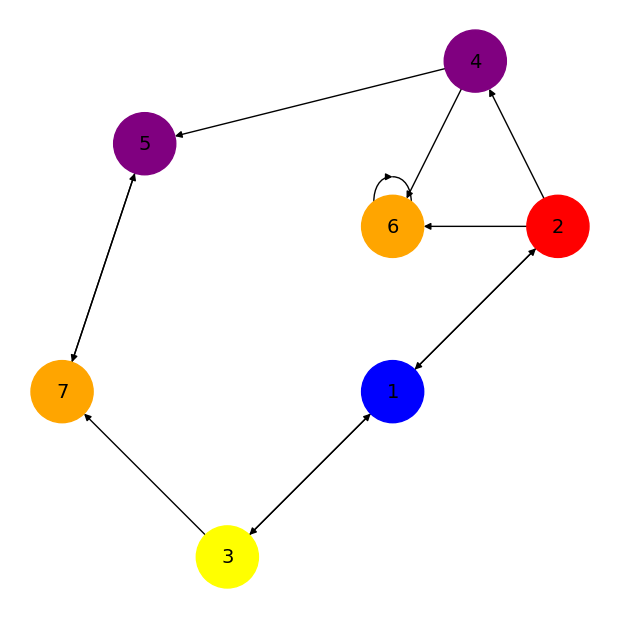

Матриця суміжності:
[[0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]
Матриця переходів:
[[0.         0.5        0.5        0.         0.         0.
  0.        ]
 [0.33333333 0.         0.         0.33333333 0.         0.33333333
  0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.5       ]
 [0.         0.         0.         0.         0.5        0.5
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]]
PageRank значення для вузлів:
Вузол 1: 0.0524
Вузол 2: 0.0437
Вузол 3: 0.0437
Вузол 4: 0.0338
Вузол 5: 0.2515
Вузол 6: 0.3212
Вузол 7: 0.2538
Мертві вузли: []
Пастки павука: [6]


In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1. Створення графа (визначення вузлів та ребер)
G = nx.DiGraph()
edges = [(1, 2), (1, 3), (2,1), (2, 4), (2,6), (3, 1),(3,7), (4, 5), (4, 6), (5, 7), (6, 6), (7, 5), ]
G.add_edges_from(edges)

# 2. Встановлення кольорів для вузлів згідно зображення
node_colors = {1: 'blue', 2: 'red', 3: 'yellow', 4: 'purple', 5: 'purple', 6: 'orange', 7: 'orange'}
colors = [node_colors[node] for node in G.nodes()]

# 3. Фіксоване розташування вузлів, щоб відповідало зображенню
pos = {
    1: (1, 0),
    2: (2, 1),
    3: (0, -1),
    4: (1.5, 2),
    5: (-0.5, 1.5),
    6: (1, 1),
    7: (-1, 0)
}

# 4. Візуалізація графа
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='black', node_size=2000, font_size=14, arrows=True)
plt.show()

# 5. Створення матриці суміжності
adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
print("Матриця суміжності:")
print(adj_matrix)

# 6. Побудова матриці переходів (нормалізація)
def transition_matrix(adj_matrix):
    P = adj_matrix.copy()
    for i in range(len(P)):
        if P[i].sum() > 0:
            P[i] /= P[i].sum()
    return P

P = transition_matrix(adj_matrix)
print("Матриця переходів:")
print(P)

# 7. Обчислення PageRank
alpha = 0.85  # Фактор загасання
n = len(P)
r = np.ones(n) / n  # Початковий вектор

def pagerank(P, alpha=0.85, tol=1.0e-6):
    n = P.shape[0]
    r = np.ones(n) / n  # Початковий вектор
    delta = 1  # Початкове значення для циклу
    while delta > tol:
        r_new = alpha * P.T @ r + (1 - alpha) / n
        delta = np.linalg.norm(r_new - r, 1)
        r = r_new
    return r

page_rank_values = pagerank(P, alpha)
print("PageRank значення для вузлів:")
for i, rank in enumerate(page_rank_values, start=1):
    print(f"Вузол {i}: {rank:.4f}")

# 8. Виявлення мертвих вузлів (без вихідних ребер) та пасток
dead_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]
print("Мертві вузли:", dead_nodes)

# 9. Виявлення пасток
spider_traps = [node for node in G.nodes() if G.in_degree(node) > 0 and G.out_degree(node) == 1 and list(G.successors(node))[0] == node]
print("Пастки павука:", spider_traps)